# Deep Learning


### MNIST Dataset
<br> handwritten digits from keras 

#### ขั้นตอนการเตรียมข้อมูล

In [38]:
import tensorflow as tf
import numpy as np
# import dataset from keras
(Xtrain,Ytrain),(Xtest,Ytest) = tf.keras.datasets.mnist.load_data()
de_Xtest = Xtest
print('Xtrain.shape',Xtrain.shape)
print('Ytrain.shape',Ytrain.shape)

Xtrain.shape (60000, 28, 28)
Ytrain.shape (60000,)


เนื่องจาก Xtrain มี 3 มิติ (จำนวน,กว้าง,ยาว)
<br>tensorflow ต้องใช้ตัวแปล 4 มิติ

In [39]:
Xtrain[:,:,:,None].shape
# 1 = color scale

(60000, 28, 28, 1)

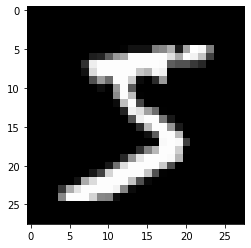

In [40]:
import matplotlib.pyplot as plt
plt.imshow(Xtrain[0],cmap='gray') # cmap = color mapping
plt.show()

MLP รองรับกับvectorที่เป็น 1 มิติเท่านั้น
<br>ต้องทำการ reshape

In [41]:
Xtrain = Xtrain.reshape(-1,28*28)
Xtest = Xtest.reshape(-1,28*28)

print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)

Xtrain (60000, 784)
Xtest (10000, 784)


##### One-Hot Encoding

ตัวอย่าง 
<br>- 2 > 1 ? ในเชิงปริมาณคือ จริง
<br>- แดง > เขียว ? คำตอบคือ ไม่รู้
<br>- 5(รูป) > 4(รูป) ? ถ้าเป็นปริมาณคือ จริง แต่ถ้าเป็น ป้ายคำตอบคือ ไม่รู้
<br>
<br>จากปัญหานี้ถ้านำ NN เข้ามามันจะถูกระบุว่า 5 > 4 ทันที
<br>One hot จะต้องนำมาทำให้ทุกอย่างไม่เกี่ยวข้องกันโดยการทำให้กลายเป็น vector ที่ตั้งฉากกัน
<br>
<br>จาก dataset มีรูป 0-9 จะแบ่งเป็น 10 classes โดยแต่ละclassจะมี 10 มิติ
<br>เลข 0 จะเก็บเป็น[1,0,0,0,0,0,0,0,0,0]
<br>เลข 1 จะเก็บเป็น[0,1,0,0,0,0,0,0,0,0]
<br>เลข 2 จะเก็บเป็น[0,0,1,0,0,0,0,0,0,0]
<br>...
<br>เลข 9 จะเก็บเป็น[0,0,0,0,0,0,0,0,0,1]

ทางเลือกเเรก
(เขียนฟังชั่นเอง)

In [5]:
def onehot(Y,nclass=10):
    Y_=np.zeros((Y.shape[0],nclass))
    for i ,y in enumerate(Y):
        Y_[i,Y[i]]=1
    return Y_

In [6]:
Ytrain = onehot(Ytrain)
Ytest = onehot(Ytest)


In [ ]:
print(Ytrain[0])

ทางเลือกสอง
(ใช้ฟังชั่นของkeras)

In [ ]:
Ytrain = tf.keras.utils.to_categorical(Ytrain,num_classes=10)

#### MLP with TF for MNIST

##### Training


In [7]:
# Architecture 
# 768 => 200 => 200 => 10
d_in = (Xtrain.shape[1],)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,input_shape=d_in,
                                activation='relu'))
model.add(tf.keras.layers.Dense(200,
                                activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))     
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))   
                
model.fit(Xtrain/255.,Ytrain,epochs=50,validation_data=(Xtest,Ytest))                    


Epoch 1/50
1875/1875 [==============================] - 15s 5ms/step - loss: 0.0904 - val_loss: 0.1701
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0900 - val_loss: 0.1660
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0895 - val_loss: 0.1610
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - val_loss: 0.1556
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0885 - val_loss: 0.1496
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - val_loss: 0.1425
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0874 - val_loss: 0.1357
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868 - val_loss: 0.1297
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0862 - val_loss: 0.1252
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.08

##### Prediction

In [8]:
Z = model.predict(Xtest/255.)
print(np.sum(Z.argmax(axis=1) == Ytest.argmax(axis=1))/len(Ytest)) # ความแม่นยำ
# argmax หาว่าตัวใดมีค่ามากที่สุด

0.7762


Predict :  [0.00918955 0.00686119 0.0147744  0.00718032 0.04174069 0.01333146
 0.00648296 0.81012315 0.01623073 0.07408568]
Max :  0.81012315
Predict Ans :  [7] | Xtest :  7


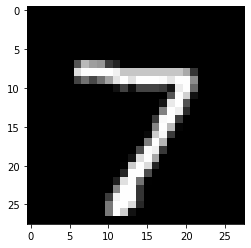

In [65]:
print('Predict : ',Z[0])
print('Max : ',np.amax(Z[0]))
print('Predict Ans : ',np.where(Z[0] == np.amax(Z[0]))[0],'| Xtest : ',Ytest[0])
plt.imshow(de_Xtest[0],cmap='gray')